In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def calculate_structure_matrix(Ix2, Iy2, Ixy):
    """Calcula a matriz de estrutura M para cada pixel."""
    h, w = Ix2.shape
    M = np.zeros((h, w, 2, 2))
    M[:, :, 0, 0] = Ix2  # M[0,0] = Σ(Ix^2)
    M[:, :, 1, 1] = Iy2  # M[1,1] = Σ(Iy^2)
    M[:, :, 0, 1] = Ixy  # M[0,1] = Σ(Ix*Iy)
    M[:, :, 1, 0] = Ixy  # M[1,0] = Σ(Ix*Iy)
    return M

def compute_harris_response(M, k=0.04):
    """Calcula a resposta de Harris (R) para cada pixel."""
    det_M = M[:, :, 0, 0] * M[:, :, 1, 1] - M[:, :, 0, 1] * M[:, :, 1, 0]  # Determinante de M
    trace_M = M[:, :, 0, 0] + M[:, :, 1, 1]  # Traço de M
    R = det_M - k * (trace_M ** 2)  # Resposta de Harris
    return R


def compute_eigenvalues(M):
    """Calcula os autovalores da matriz de estrutura M para cada pixel."""
    h, w = M.shape[:2]
    eigenvalues = np.zeros((h, w, 2))

    for i in range(h):
        for j in range(w):
            a = M[i, j, 0, 0]
            b = M[i, j, 0, 1]
            c = M[i, j, 1, 1]

            # Traço e determinante da matriz M
            trace = a + c
            determinant = a * c - b * b

            # Cálculo dos autovalores usando a fórmula quadrática
            discriminant = np.sqrt(trace**2 - 4 * determinant)
            lambda1 = (trace + discriminant) / 2
            lambda2 = (trace - discriminant) / 2

            eigenvalues[i, j] = [lambda1, lambda2]

    return eigenvalues

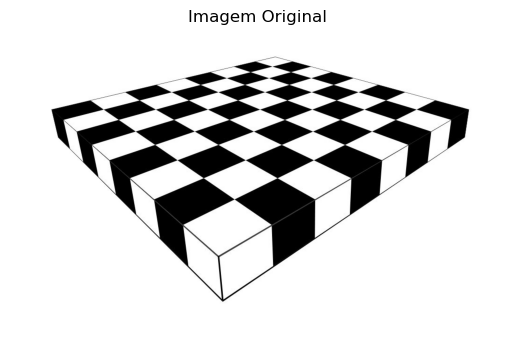

In [4]:
img = cv.imread("../src/chessboard.jpg")

plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

[]

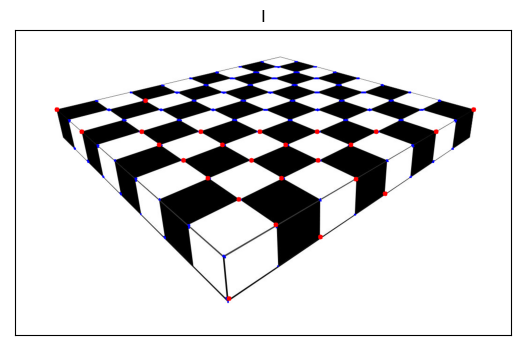

In [5]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# get corners from harris method
dst1 = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
kernel = np.ones((3, 3), "uint8")
dst1 = cv.dilate(dst1,kernel)

# Marks Harris corners in blue
# Threshold for an optimal value, it may vary depending on the image.
img[dst1>0.01*dst1.max()]=[0,0,255]

# get corners from shi-tomasi method
dst2 = cv.goodFeaturesToTrack(gray,25,0.01,10)
dst2 = np.intp(dst2)

# marks shi-tomasi corners in red
for i in dst2:
    x,y = i.ravel()
    cv.circle(img,(x,y),5,255,-1)

fig1 = plt.figure(1)
ax1 = fig1.subplots()
ax1.imshow(img)
ax1.title.set_text('I')
ax1.set_xticks([])
ax1.set_yticks([])

# Questão 1

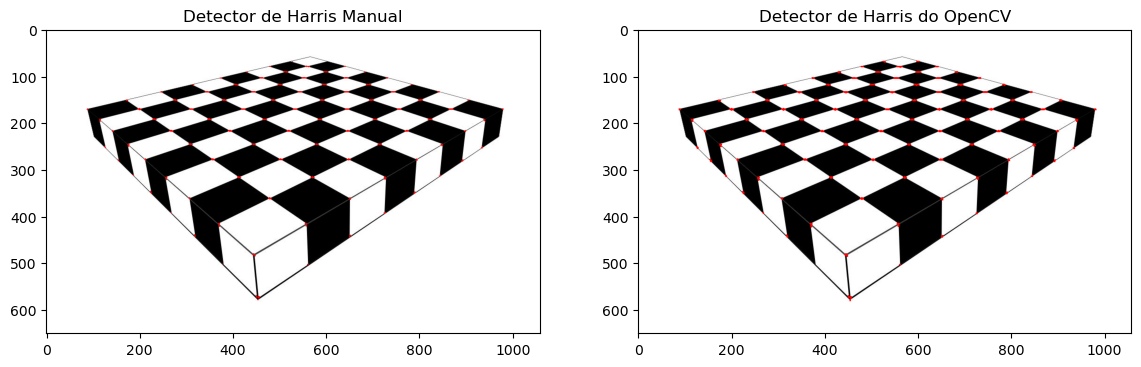

In [2]:
# Carregar a imagem e convertê-la para escala de cinza
img = cv.imread("../src/chessboard.jpg")
img_copy = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Aplicar o detector de cantos de Harris do OpenCV
harris_dst = cv.cornerHarris(gray, 2, 3, 0.04)
harris_dst = cv.dilate(harris_dst, np.ones((3, 3), "uint8"))
img_copy[harris_dst > 0.01 * harris_dst.max()] = [0, 0, 255]

# Calcular as derivadas Ix e Iy usando o filtro Sobel
Ix = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
Iy = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# Calcular os produtos Ix^2, Iy^2 e Ix*Iy
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix * Iy

# Suavizar os produtos usando filtro gaussiano
Ix2 = cv.GaussianBlur(Ix2, (15, 15), 1)
Iy2 = cv.GaussianBlur(Iy2, (15, 15), 1)
Ixy = cv.GaussianBlur(Ixy, (15, 15), 1)

# Calcular a matriz de estrutura M e a resposta de Harris
M = calculate_structure_matrix(Ix2, Iy2, Ixy)
R = compute_harris_response(M)

# Identificar e destacar cantos com base na resposta de Harris
corners = np.zeros_like(R)
corners[R > 0.05 * R.max()] = 1
img_corners = img.copy()
img_corners[corners == 1] = [0, 0, 255]

# Exibir os resultados
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.title("Detector de Harris Manual")
plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Detector de Harris do OpenCV")
plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))

plt.show()


# Questão 2

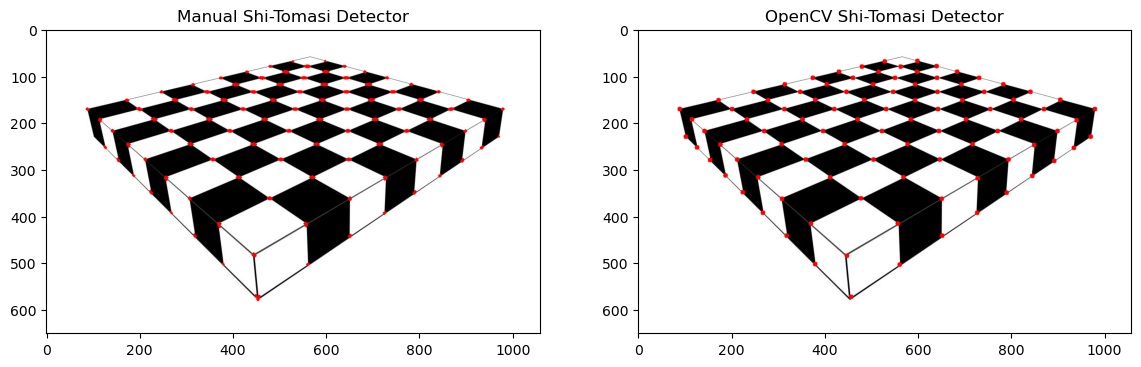

In [14]:
# Carregar a imagem e convertê-la para escala de cinza
img = cv.imread("../src/chessboard.jpg")
img_copy = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Detectar cantos usando o método Shi-Tomasi do OpenCV
shi_tomasi_corners = cv.goodFeaturesToTrack(gray, 97, 0.01, 10)
shi_tomasi_corners = np.intp(shi_tomasi_corners)

# Marcar os cantos detectados em vermelho na imagem copiada
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv.circle(img_copy, (x, y), 5, 255, -1)

# Calcular as derivadas Ix e Iy usando o filtro Sobel
Ix = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
Iy = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)

# Calcular os produtos Ix^2, Iy^2 e Ix*Iy
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix * Iy

# Suavizar os produtos usando filtro gaussiano
Ix2 = cv.GaussianBlur(Ix2, (15, 15), 1)
Iy2 = cv.GaussianBlur(Iy2, (15, 15), 1)
Ixy = cv.GaussianBlur(Ixy, (15, 15), 1)

# Calcular a matriz de estrutura M e os autovalores
M = calculate_structure_matrix(Ix2, Iy2, Ixy)
eigenvalues = compute_eigenvalues(M)

# Calcular a resposta de Shi-Tomasi como o menor autovalor
R = np.min(eigenvalues, axis=2)

# Definir o limiar para identificar cantos
threshold = 0.1 * R.max()
corners = np.zeros_like(R)
corners[R > threshold] = 1

# Destacar cantos detectados na imagem original
img_corners = img.copy()
for y in range(corners.shape[0]):
    for x in range(corners.shape[1]):
        if corners[y, x] == 1:
            cv.circle(img_corners, (x, y), 2, (255, 0, 0), -1)

# Exibir os resultados
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.title("Detector de Shi-Tomasi Manual")
plt.imshow(cv.cvtColor(img_corners, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Detector de Shi-Tomasi do OpenCV")
plt.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))

plt.show()
